In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('grades.csv', sep=';')

In [3]:
df.head()

,judge,group,criteria,grade
0,joakim,1,Business Strategy Analysis,3
1,joakim,1,Failure Analysis,3
2,joakim,1,Cost and Schedule Analysis,4
3,joakim,1,Recommendation,4
4,joakim,1,DSM Insights,3


In [4]:
# get the descriptive data from describe() for each combination of judge and group, as well as for each group and all judges, and each judge and all groups
for judge in df['judge'].unique():
    print(f'Judge {judge}')
    print(df[df['judge'] == judge].describe())
    print('\n')

for group in df['group'].unique():
    print(f'Group {group}')
    print(df[df['group'] == group].describe())
    print('\n')

Judge joakim
           group      grade
count  42.000000  42.000000
mean    4.000000   3.500000
std     2.024243   0.803954
min     1.000000   2.000000
25%     2.000000   3.000000
50%     4.000000   3.500000
75%     6.000000   4.000000
max     7.000000   5.000000


Judge soren
           group      grade
count  42.000000  42.000000
mean    4.000000   3.285714
std     2.024243   0.805036
min     1.000000   2.000000
25%     2.000000   3.000000
50%     4.000000   3.000000
75%     6.000000   4.000000
max     7.000000   5.000000


Judge steve
           group      grade
count  42.000000  42.000000
mean    4.000000   3.857143
std     2.024243   0.751305
min     1.000000   2.000000
25%     2.000000   3.250000
50%     4.000000   4.000000
75%     6.000000   4.000000
max     7.000000   5.000000


Group 1
       group      grade
count   18.0  18.000000
mean     1.0   3.722222
std      0.0   0.574513
min      1.0   3.000000
25%      1.0   3.000000
50%      1.0   4.000000
75%      1.0   4.000000
m

In [5]:
df['grade'] = df['grade']/5*100

In [6]:
df.head()

,judge,group,criteria,grade
0,joakim,1,Business Strategy Analysis,60.0
1,joakim,1,Failure Analysis,60.0
2,joakim,1,Cost and Schedule Analysis,80.0
3,joakim,1,Recommendation,80.0
4,joakim,1,DSM Insights,60.0


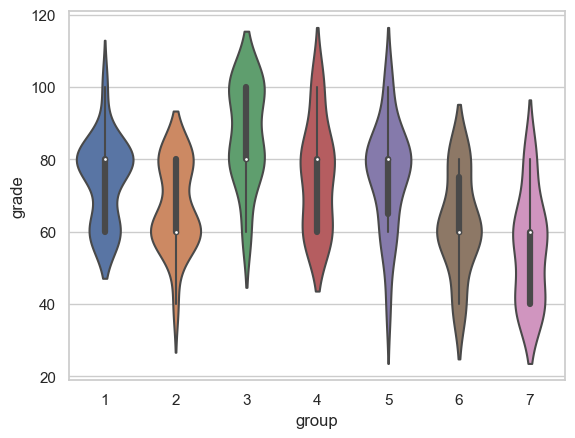

In [7]:
# plot some nice things from df
sns.set_theme(style="whitegrid")
sns.violinplot(x='group', y='grade', data=df)
plt.show()

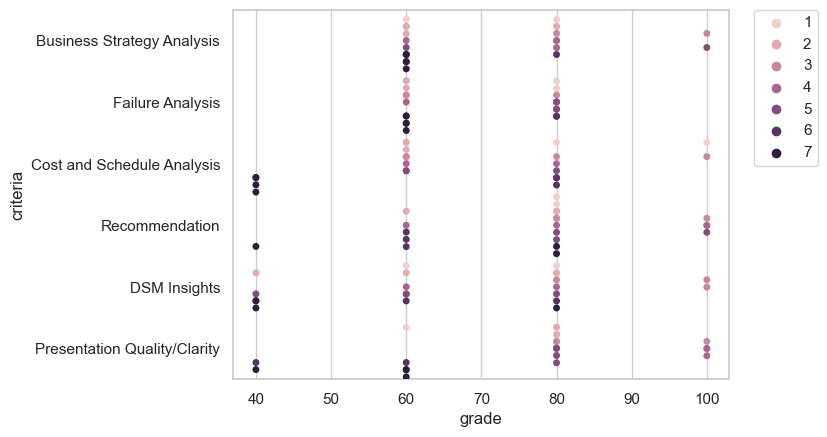

In [8]:
# put the legand out of the plot
ax = sns.swarmplot(data=df, x="grade", y="criteria", hue="group", dodge=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

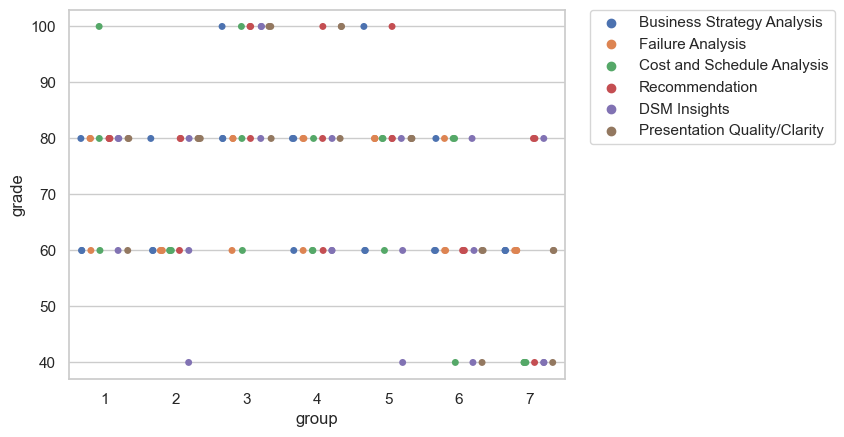

In [9]:
# https://seaborn.pydata.org/examples/jitter_stripplot.html
ax = sns.stripplot(x="group", y="grade", data=df, jitter=True, hue='criteria', dodge=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

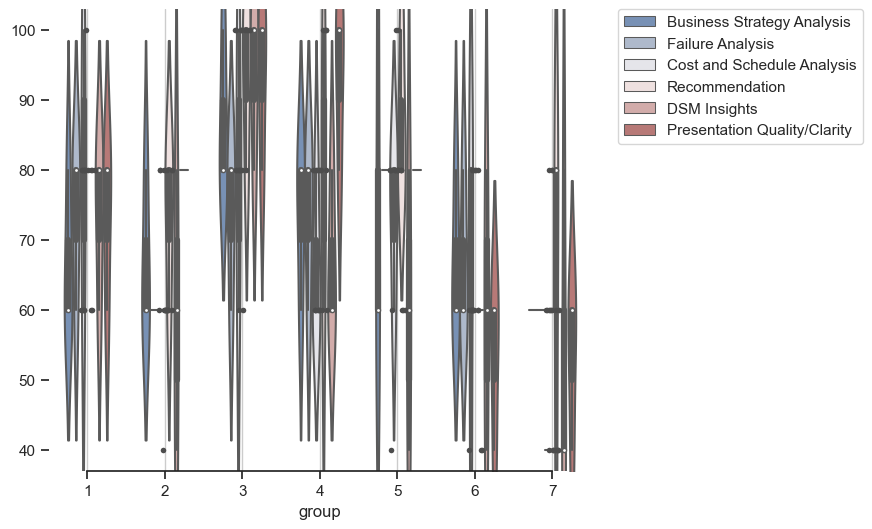

In [10]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.violinplot(
    df, x="group", y="grade", hue="criteria",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df, x="group", y="grade", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(trim=True, left=True)

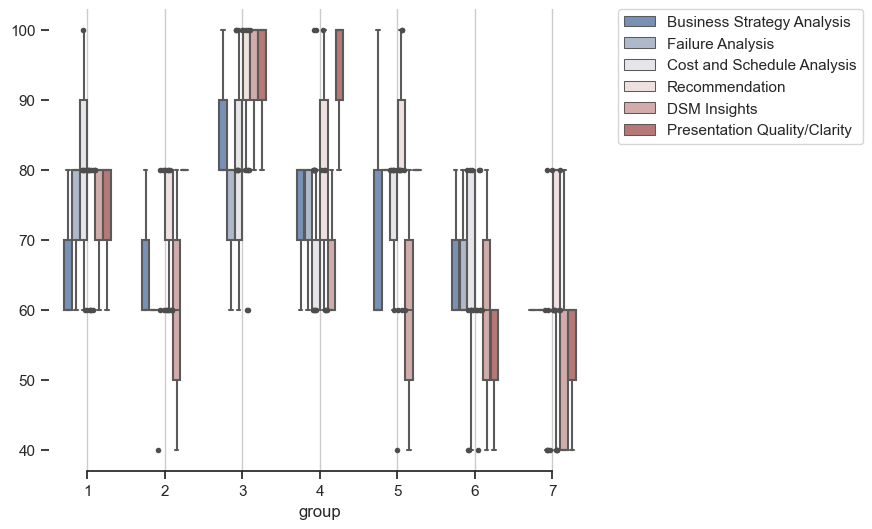

In [11]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df, x="group", y="grade", hue="criteria",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df, x="group", y="grade", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(trim=True, left=True)

C:\Users\inigo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


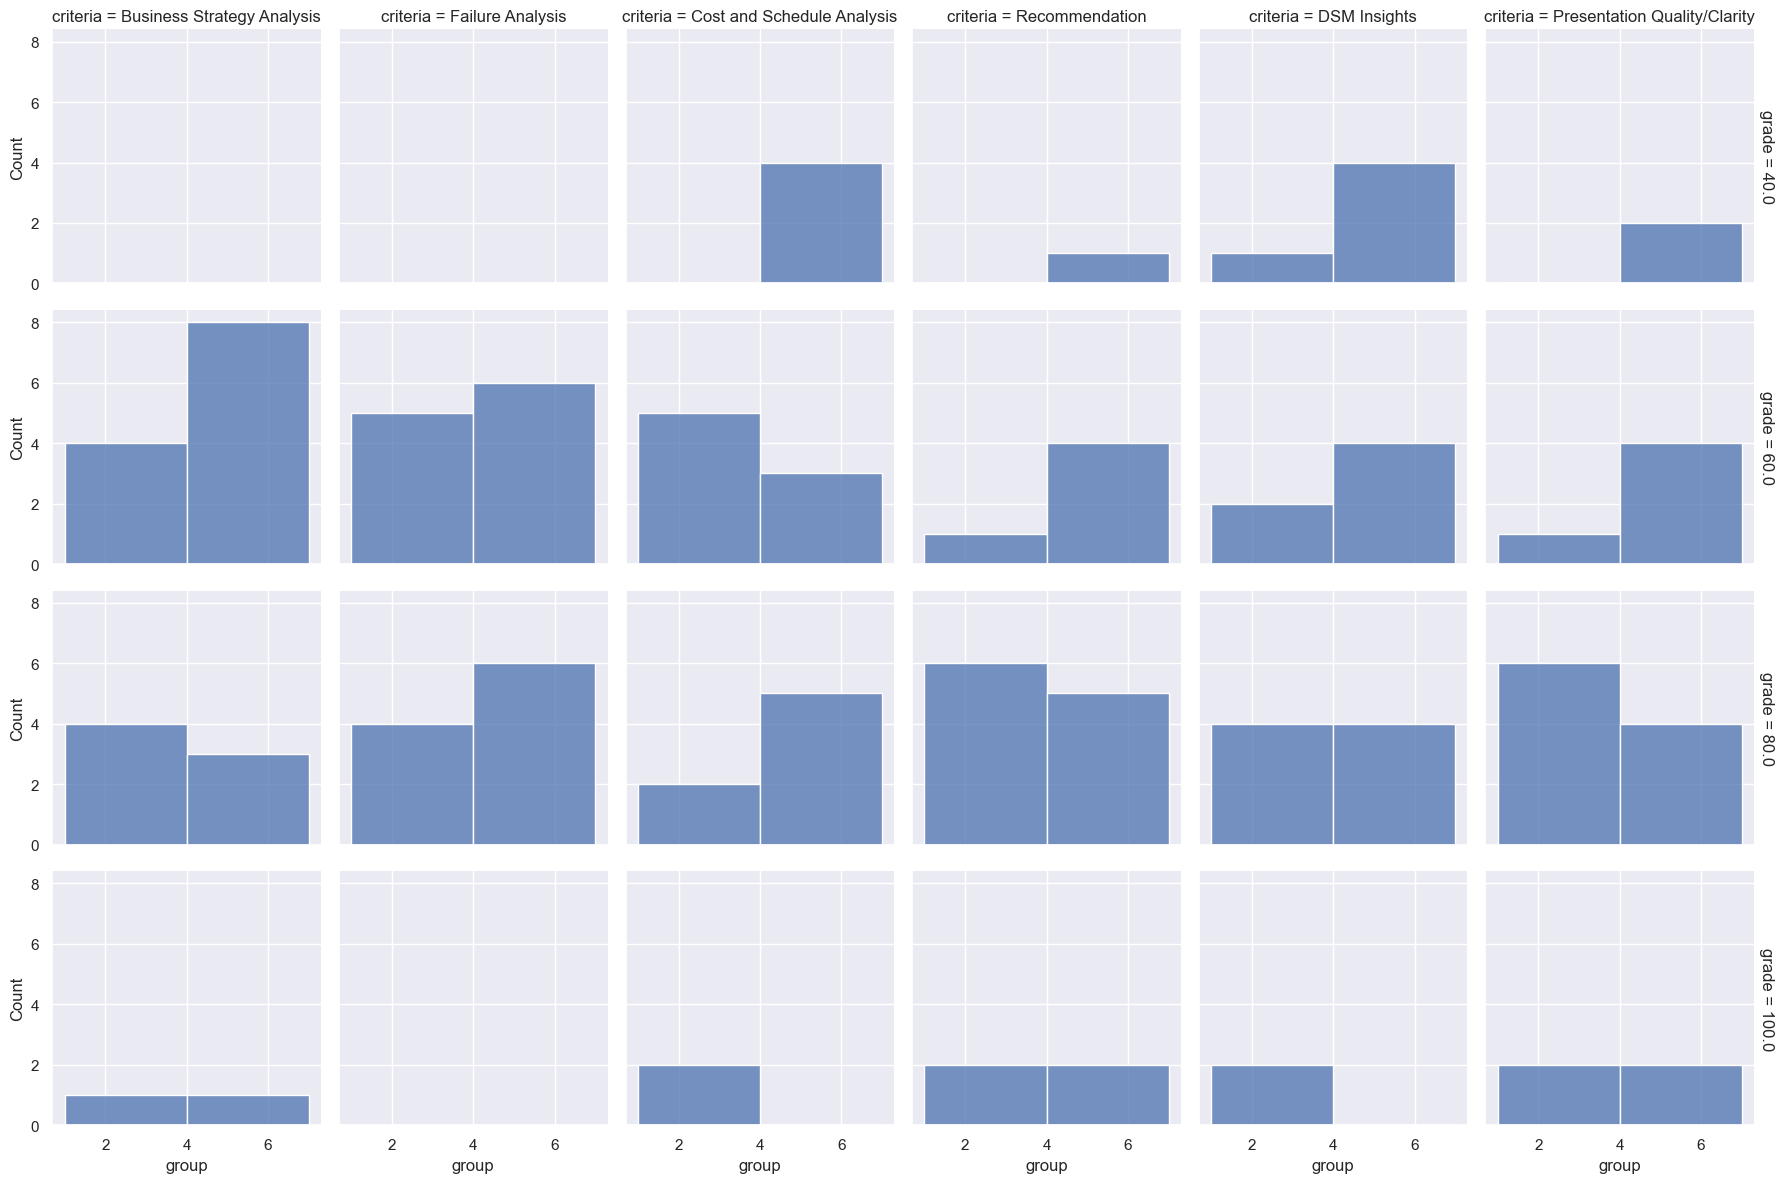

In [13]:
sns.set_theme(style="darkgrid")
sns.displot(
    df, x="group", col="criteria", row="grade",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

C:\Users\inigo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


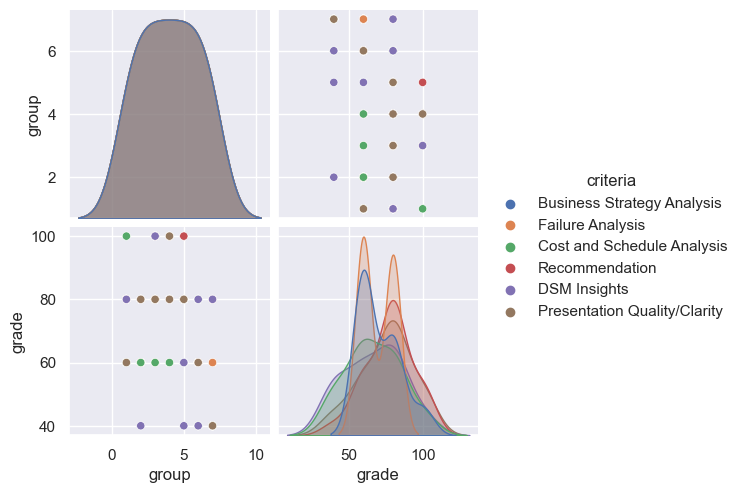

In [15]:
sns.pairplot(df, hue="criteria")

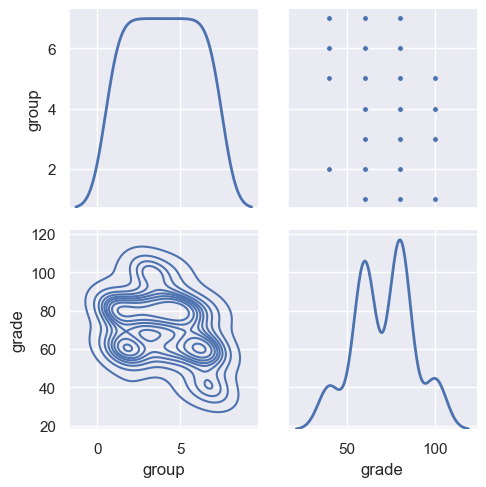

In [16]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

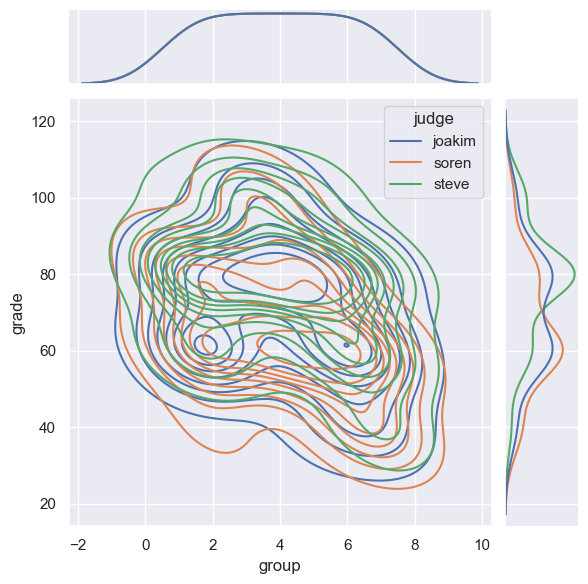

In [18]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="group", y="grade", hue="judge",
    kind="kde",
)

KeyError: "['abbrev'] not in index"

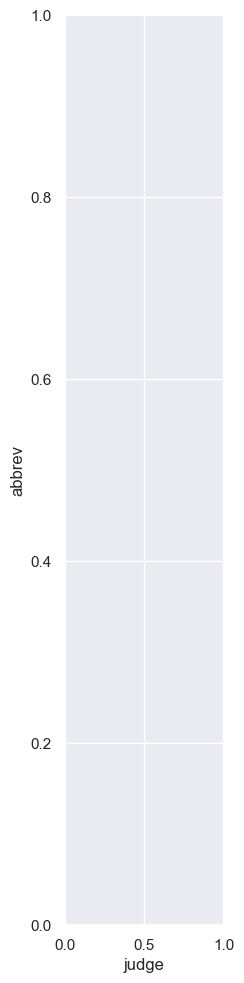

In [24]:
# Make the PairGrid
g = sns.PairGrid(df.sort_values("group", ascending=False),
                x_vars=df.columns[:-3], y_vars=["abbrev"],
                height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
    palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
        "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)